In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# Load datasets
train_df = pd.read_excel("train(1).xlsx")
test_df = pd.read_excel("test2.xlsx")

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

Train shape: (16209, 21)
Test shape : (5404, 20)


In [3]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [5]:
train_df.isnull().sum().sort_values(ascending=False)


id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

In [6]:
train_df.isnull().sum().sort_values(ascending=False)


id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

In [7]:
train_df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# EDA

## Target variable distribution

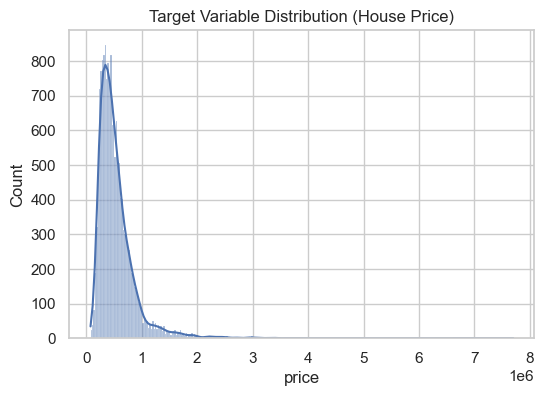

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(train_df["price"], kde=True)
plt.title("Target Variable Distribution (House Price)")
plt.show()


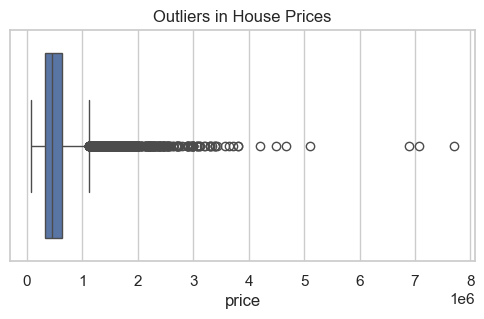

In [9]:
plt.figure(figsize=(6,3))
sns.boxplot(x=train_df["price"])
plt.title("Outliers in House Prices")
plt.show()


In [12]:
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

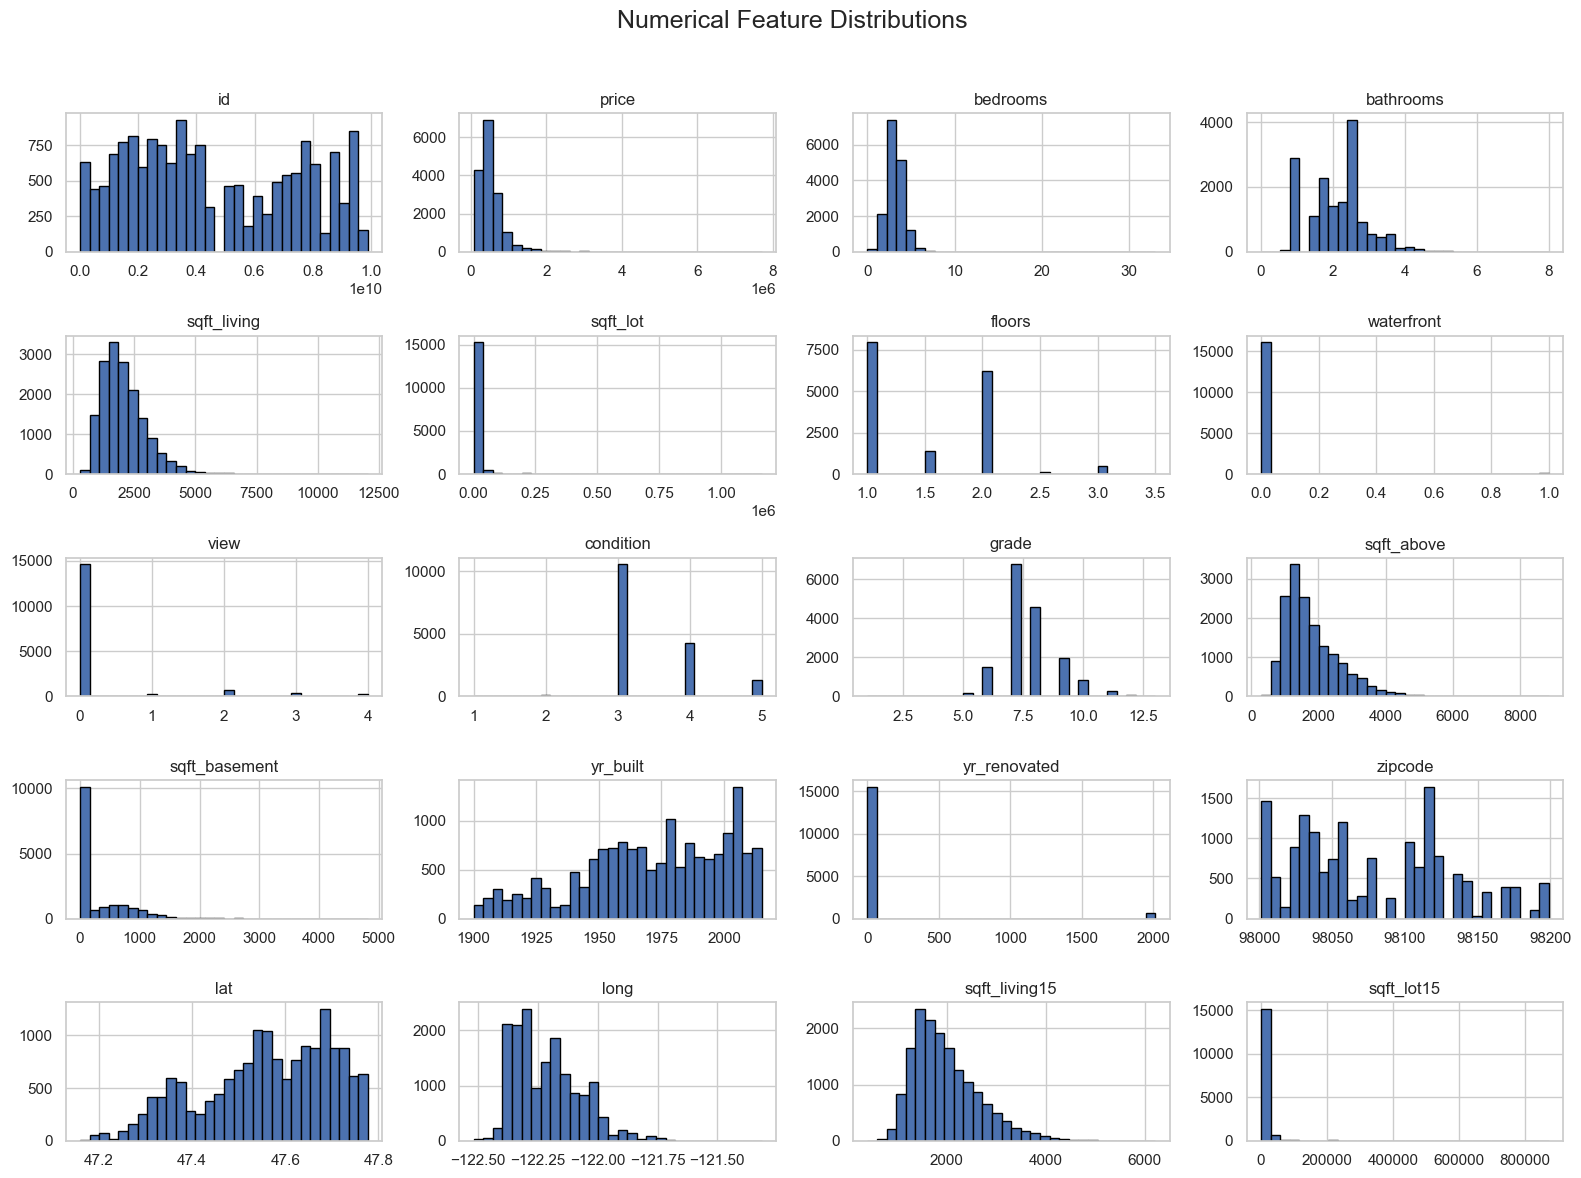

In [13]:
train_df[num_cols].hist(
    figsize=(16, 12),
    bins=30,
    edgecolor="black"
)

plt.suptitle("Numerical Feature Distributions", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [14]:
cat_cols = train_df.select_dtypes(include=["object"]).columns
cat_cols


Index(['date'], dtype='object')

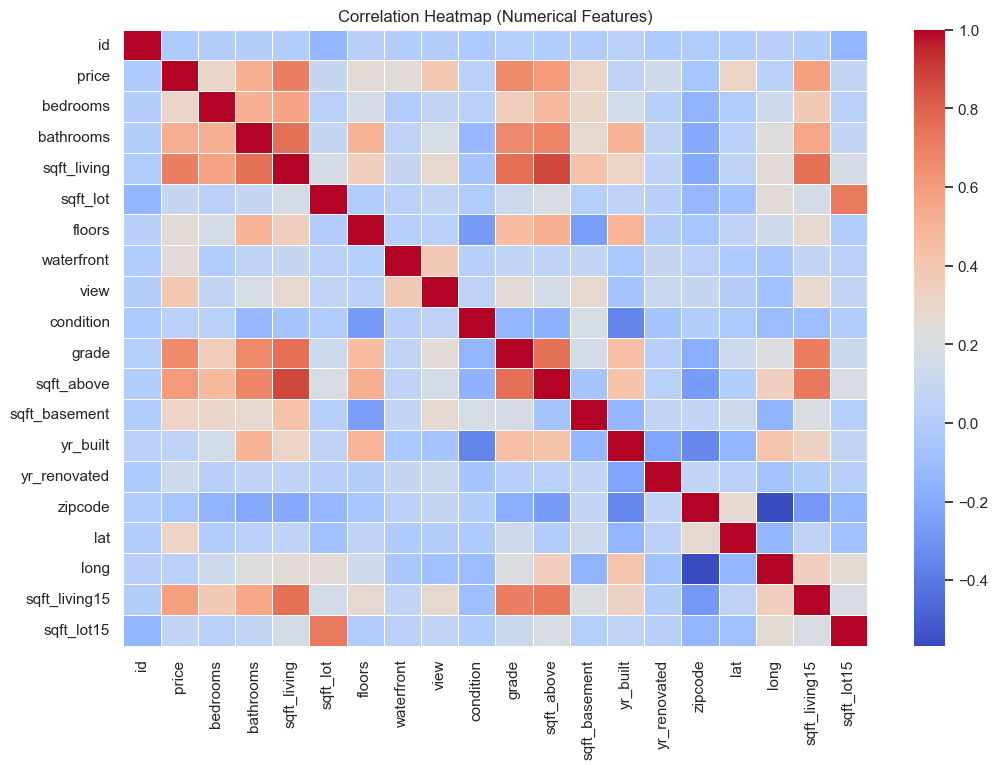

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(
    train_df[num_cols].corr(),
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


### EDA Summary

- Target (price) is right skewed with outliers
- Features have different scales → scaling needed
- Date column is stored as string
- Categorical variables require encoding
- Some features strongly correlate with price


In [16]:
# Correlation of numerical features with target
corr_with_price = (
    train_df[num_cols]
    .corr()["price"]
    .sort_values(ascending=False)
)

corr_with_price


price            1.000000
sqft_living      0.700933
grade            0.664266
sqft_above       0.602648
sqft_living15    0.581781
bathrooms        0.525487
view             0.390534
sqft_basement    0.320301
lat              0.310008
bedrooms         0.304454
floors           0.251428
waterfront       0.245221
yr_renovated     0.133075
sqft_lot         0.088526
sqft_lot15       0.076060
yr_built         0.048307
condition        0.031333
long             0.024279
id              -0.020260
zipcode         -0.054517
Name: price, dtype: float64

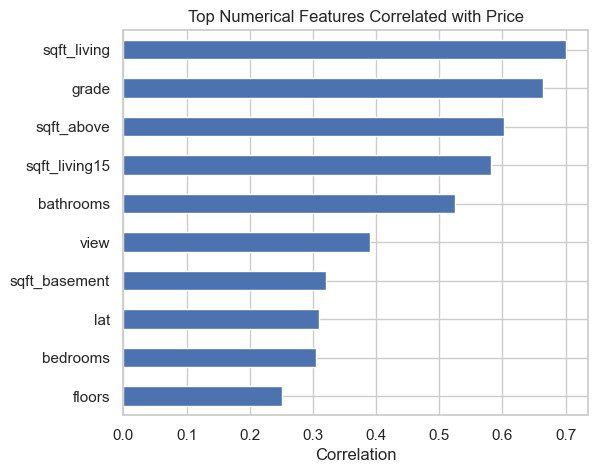

In [17]:
plt.figure(figsize=(6,5))
corr_with_price.drop("price").head(10).plot(kind="barh")
plt.title("Top Numerical Features Correlated with Price")
plt.xlabel("Correlation")
plt.gca().invert_yaxis()
plt.show()


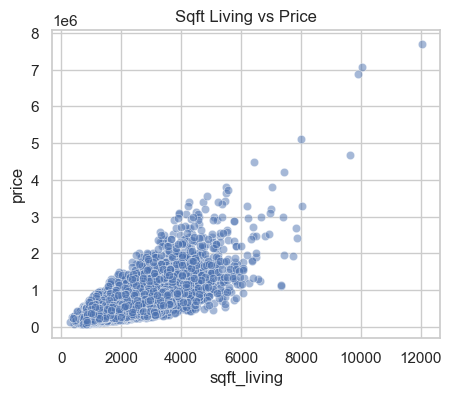

In [18]:
plt.figure(figsize=(5,4))
sns.scatterplot(
    x=train_df["sqft_living"],
    y=train_df["price"],
    alpha=0.5
)
plt.title("Sqft Living vs Price")
plt.show()


In [19]:
train_df["date"].head()


0    20150505T000000
1    20140708T000000
2    20150115T000000
3    20150427T000000
4    20141205T000000
Name: date, dtype: object

In [20]:
train_df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
# =========================================
# FEATURE ENGINEERING
# =========================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

# Drop ID column
train_df = train_df.drop(columns=["id"])

# Handle date column
train_df["date"] = pd.to_datetime(
    train_df["date"],
    format="%Y%m%dT%H%M%S"
)
train_df["sale_year"] = train_df["date"].dt.year
train_df["sale_month"] = train_df["date"].dt.month
train_df = train_df.drop(columns=["date"])

# Log transform target
train_df["price_log"] = np.log1p(train_df["price"])

# =========================================
# FEATURE SELECTION
# =========================================

features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition", "grade",
    "sqft_above", "sqft_basement",
    "yr_built", "yr_renovated",
    "lat", "long",
    "sqft_living15", "sqft_lot15",
    "sale_year", "sale_month"
]

X = train_df[features]
y = train_df["price_log"]

# =========================================
# TRAIN–VALIDATION SPLIT
# =========================================

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# =========================================
# FEATURE SCALING
# =========================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_val_scaled = pd.DataFrame(
    X_val_scaled,
    columns=X_val.columns,
    index=X_val.index
)

# =========================================
# SAVE DATA
# =========================================

os.makedirs("data_cdc", exist_ok=True)

X_train_scaled.to_csv("data_cdc/X_train.csv", index=False)
X_val_scaled.to_csv("data_cdc/X_val.csv", index=False)
y_train.to_csv("data_cdc/y_train.csv", index=False)
y_val.to_csv("data_cdc/y_val.csv", index=False)


In [22]:
print("X_train:", X_train.shape)
print("X_val  :", X_val.shape)

X_train: (12967, 19)
X_val  : (3242, 19)


In [23]:
y_train

4140     12.566195
1510     12.899222
6706     13.480039
11009    13.853770
6554     14.437162
           ...    
13418    13.709039
5390     13.617061
860      12.834684
15795    13.197473
7270     12.652363
Name: price_log, Length: 12967, dtype: float64